In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
conn = engine.connect()

# Exploratory Climate Analysis

### Precipitation Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [12]:
stmt = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
                    filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).statement
df = pd.read_sql_query(stmt, conn)
df.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28
11,2016-08-24,1.22


In [13]:
grouped_data = df.groupby(["date"]).mean()
grouped_data.head()

,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


<Figure size 432x288 with 0 Axes>

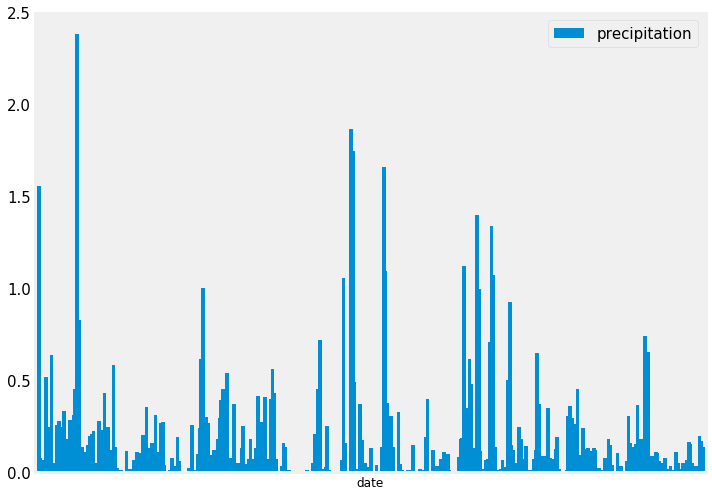

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
grouped_data.plot(kind = "bar", figsize=(10,7), fontsize = 15, width = 2)
plt.legend(["precipitation"], loc = "best", fontsize = 15)

plt.xticks([])
plt.grid()
plt.tight_layout()
plt.savefig("Images/precipitation_over_the_past_year.png")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station Analysis

In [16]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.name).count()
station_count

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stmt2 = session.query(Measurement.station, func.count(Measurement.date)).\
                group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).statement
station_data = pd.read_sql_query(stmt2, conn)
station_data = station_data.rename(columns={"station":"station_id","count_1":"rows_counts"})
station_data

,station_id,rows_counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
statistics = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.station == "USC00519281").all()
statistics

[(54.0, 71.66378066378067, 85.0)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stmt3 = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.station == "USC00519281").filter(Measurement.date >= '2016-08-23').\
                    filter(Measurement.date <= '2017-08-23').statement
active_station_data = pd.read_sql_query(stmt3, conn)
active_station_data.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


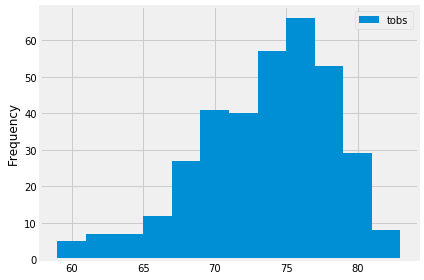

In [20]:
active_station_data.hist(bins = 12, figsize = (6, 4))
plt.ylabel("Frequency")
plt.title("")
plt.legend(["tobs"], loc = "best")
plt.tight_layout()
plt.savefig("Images/temp_histogram.png")
plt.show()

# Optional Challenge Assignment

### Temperature Analysis I

In [21]:
# June Temperature Data
june_temp = session.query(func.avg(Measurement.tobs)).\
                filter(func.strftime("%m", Measurement.date) == "06").\
                group_by(func.strftime("%d", Measurement.date)).all()
june_temp

[(74.6140350877193),
 (74.4),
 (74.03448275862068),
 (73.81818181818181),
 (74.85454545454546),
 (75.17543859649123),
 (75.07142857142857),
 (75.58620689655173),
 (75.15254237288136),
 (75.14285714285714),
 (76.01960784313725),
 (75.66666666666667),
 (75.66666666666667),
 (75.62711864406779),
 (75.40350877192982),
 (75.41379310344827),
 (74.59322033898304),
 (74.60344827586206),
 (75.44067796610169),
 (73.96491228070175),
 (74.75862068965517),
 (75.15789473684211),
 (74.54385964912281),
 (74.96428571428571),
 (74.10344827586206),
 (74.21428571428571),
 (75.01785714285714),
 (74.88679245283019),
 (74.91525423728814),
 (75.59615384615384)]

In [22]:
june_temp = list(np.ravel(june_temp))
june_temp

[74.6140350877193,
 74.4,
 74.03448275862068,
 73.81818181818181,
 74.85454545454546,
 75.17543859649123,
 75.07142857142857,
 75.58620689655173,
 75.15254237288136,
 75.14285714285714,
 76.01960784313725,
 75.66666666666667,
 75.66666666666667,
 75.62711864406779,
 75.40350877192982,
 75.41379310344827,
 74.59322033898304,
 74.60344827586206,
 75.44067796610169,
 73.96491228070175,
 74.75862068965517,
 75.15789473684211,
 74.54385964912281,
 74.96428571428571,
 74.10344827586206,
 74.21428571428571,
 75.01785714285714,
 74.88679245283019,
 74.91525423728814,
 75.59615384615384]

In [23]:
# June Avg Temperature
june_avg_temp = session.query(func.avg(Measurement.tobs)).\
                    filter(func.strftime("%m", Measurement.date) == "06").\
                    group_by(func.strftime("%m", Measurement.date)).all()
june_avg_temp

[(74.94411764705882)]

In [24]:
# December Temperature Data
dec_temp = session.query(func.avg(Measurement.tobs)).\
                filter(func.strftime("%m", Measurement.date) == "12").\
                group_by(func.strftime("%d", Measurement.date)).all()
dec_temp = list(np.ravel(dec_temp))
dec_temp

[71.91666666666667,
 71.32692307692308,
 72.88679245283019,
 72.17647058823529,
 70.92156862745098,
 69.3921568627451,
 69.2,
 70.27450980392157,
 71.90196078431373,
 71.24528301886792,
 72.38775510204081,
 70.88235294117646,
 70.9423076923077,
 71.18,
 71.34,
 69.62264150943396,
 70.64,
 71.28,
 72.0,
 72.91304347826087,
 72.13953488372093,
 71.1304347826087,
 70.34693877551021,
 70.0625,
 71.75,
 71.44680851063829,
 71.91666666666667,
 70.52083333333333,
 70.29166666666667,
 69.86363636363636,
 68.27906976744185]

In [25]:
# December Avg Temperature
dec_avg_temp = session.query(func.avg(Measurement.tobs)).\
                    filter(func.strftime("%m", Measurement.date) == "12").\
                    group_by(func.strftime("%m", Measurement.date)).all()
dec_avg_temp

[(71.04152933421226)]

In [26]:
import scipy.stats as stats

In [27]:
stats.ttest_ind(june_temp, dec_temp, equal_var=False)

Ttest_indResult(statistic=17.619694805351532, pvalue=5.093309139082608e-22)

p-value = 0, ∴ the difference in June and December temperature averages is statistically significant.

Use an unpaired t-test, since the temperatures in June are independent to that in December.

i.e., assume that temperatures in different months are independent to each other.

### Temperature Analysis II

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# trip date from 2017-06-27 to 2017-07-02
result = calc_temps("2016-06-27", "2016-07-02")
result_lst = [result[0][i] for i in range(0,len(result[0]))]
result_lst

[71.0, 77.13513513513513, 82.0]

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin = result_lst[0]
tavg = result_lst[1]
tmax = result_lst[2]
ptp = tmax - tmin

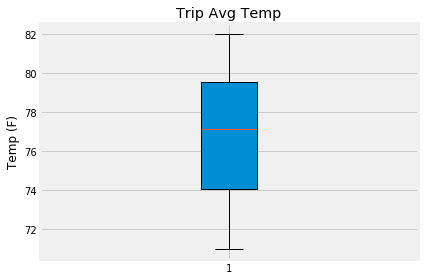

In [31]:
# Things are missing for this box plot...

fig, ax = plt.subplots()
x = range(len(result_lst))
ax.boxplot(result_lst, patch_artist = True)
           #, color = "coral", aplha = 0.8)
# ax.errorbar(yerr = ptp)
#yerr = ptp
ax.set_title("Trip Avg Temp")
ax.set_ylabel("Temp (F)")
fig.tight_layout()
plt.show()

### Daily Rainfall Average

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using 
# the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, 
# longitude, and elevation

# again, trip date from 2017-06-27 to 2017-07-02
stmt4 = session.query(Measurement.station, Measurement.prcp).\
                filter(Measurement.date >= "2016-06-27").filter(Measurement.date <= "2016-07-02").statement
rainfall_df = pd.read_sql_query(stmt4, conn)
rainfall_df.dropna()

,station,prcp
0,USC00519397,0.01
1,USC00519397,0.00
2,USC00519397,0.00
3,USC00519397,0.00
4,USC00519397,0.00
5,USC00519397,0.00
6,USC00513117,0.06
7,USC00513117,0.02
8,USC00513117,0.03
9,USC00513117,0.00


In [33]:
rainfall_per_station = rainfall_df.groupby("station").sum()
rainfall_per_station

,prcp
station,
USC00513117,0.11
USC00514830,0.06
USC00516128,0.90
USC00517948,0.00
USC00519281,0.71
USC00519397,0.01
USC00519523,0.00


In [34]:
station_df = pd.read_csv("Resources/hawaii_stations.csv")
station_df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [35]:
merged_df = pd.merge(station_df, rainfall_per_station, on = "station")
merged_df = merged_df.sort_values("prcp", ascending = False)
merged_df

,station,name,latitude,longitude,elevation,prcp
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.90
5,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.71
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.11
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.06
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.01
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00


In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
# 2017-06-27 ~ 2017-07-02

# Use the start and end date to create a range of dates
trip_dates = [dt.date(2017,6,27),dt.date(2017,6,28),dt.date(2017,6,29),
         dt.date(2017,6,30),dt.date(2017,7,1),dt.date(2017,7,2)]

# Strip off the year and save a list of %m-%d strings
dates_m_d = [date.strftime("%m-%d") for date in trip_dates] 
dates_m_d

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(date) for date in dates_m_d]
normals

[[(66.0, 75.01785714285714, 81.0)],
 [(69.0, 74.88679245283019, 80.0)],
 [(67.0, 74.91525423728814, 80.0)],
 [(67.0, 75.59615384615384, 81.0)],
 [(67.0, 74.77777777777777, 81.0)],
 [(68.0, 75.40384615384616, 82.0)]]

In [38]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_min = [i[0][0] for i in normals]
daily_avg = [i[0][1] for i in normals]
daily_max = [i[0][2] for i in normals]

trip_df = pd.DataFrame({"daily_min": daily_min,
                        "daily_avg": daily_avg,
                        "daily_max": daily_max},
                      index = trip_dates)
trip_df

,daily_min,daily_avg,daily_max
2017-06-27,66.0,75.017857,81.0
2017-06-28,69.0,74.886792,80.0
2017-06-29,67.0,74.915254,80.0
2017-06-30,67.0,75.596154,81.0
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0


<Figure size 432x288 with 0 Axes>

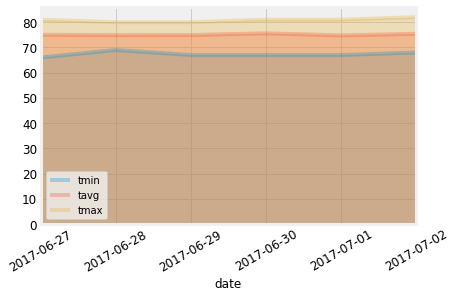

In [39]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure()

trip_df.plot(kind = "area", stacked = False, alpha = 0.3, fontsize = 12)
plt.legend(["tmin","tavg","tmax"])
plt.xticks(rotation = 30)
plt.xlabel("date")

plt.show()